In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/ADNI/PD T2/voxel2.zip'
extract_path = '/content/data'  # Spécifiez le chemin où vous voulez extraire les fichiers

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#### AD

##### k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


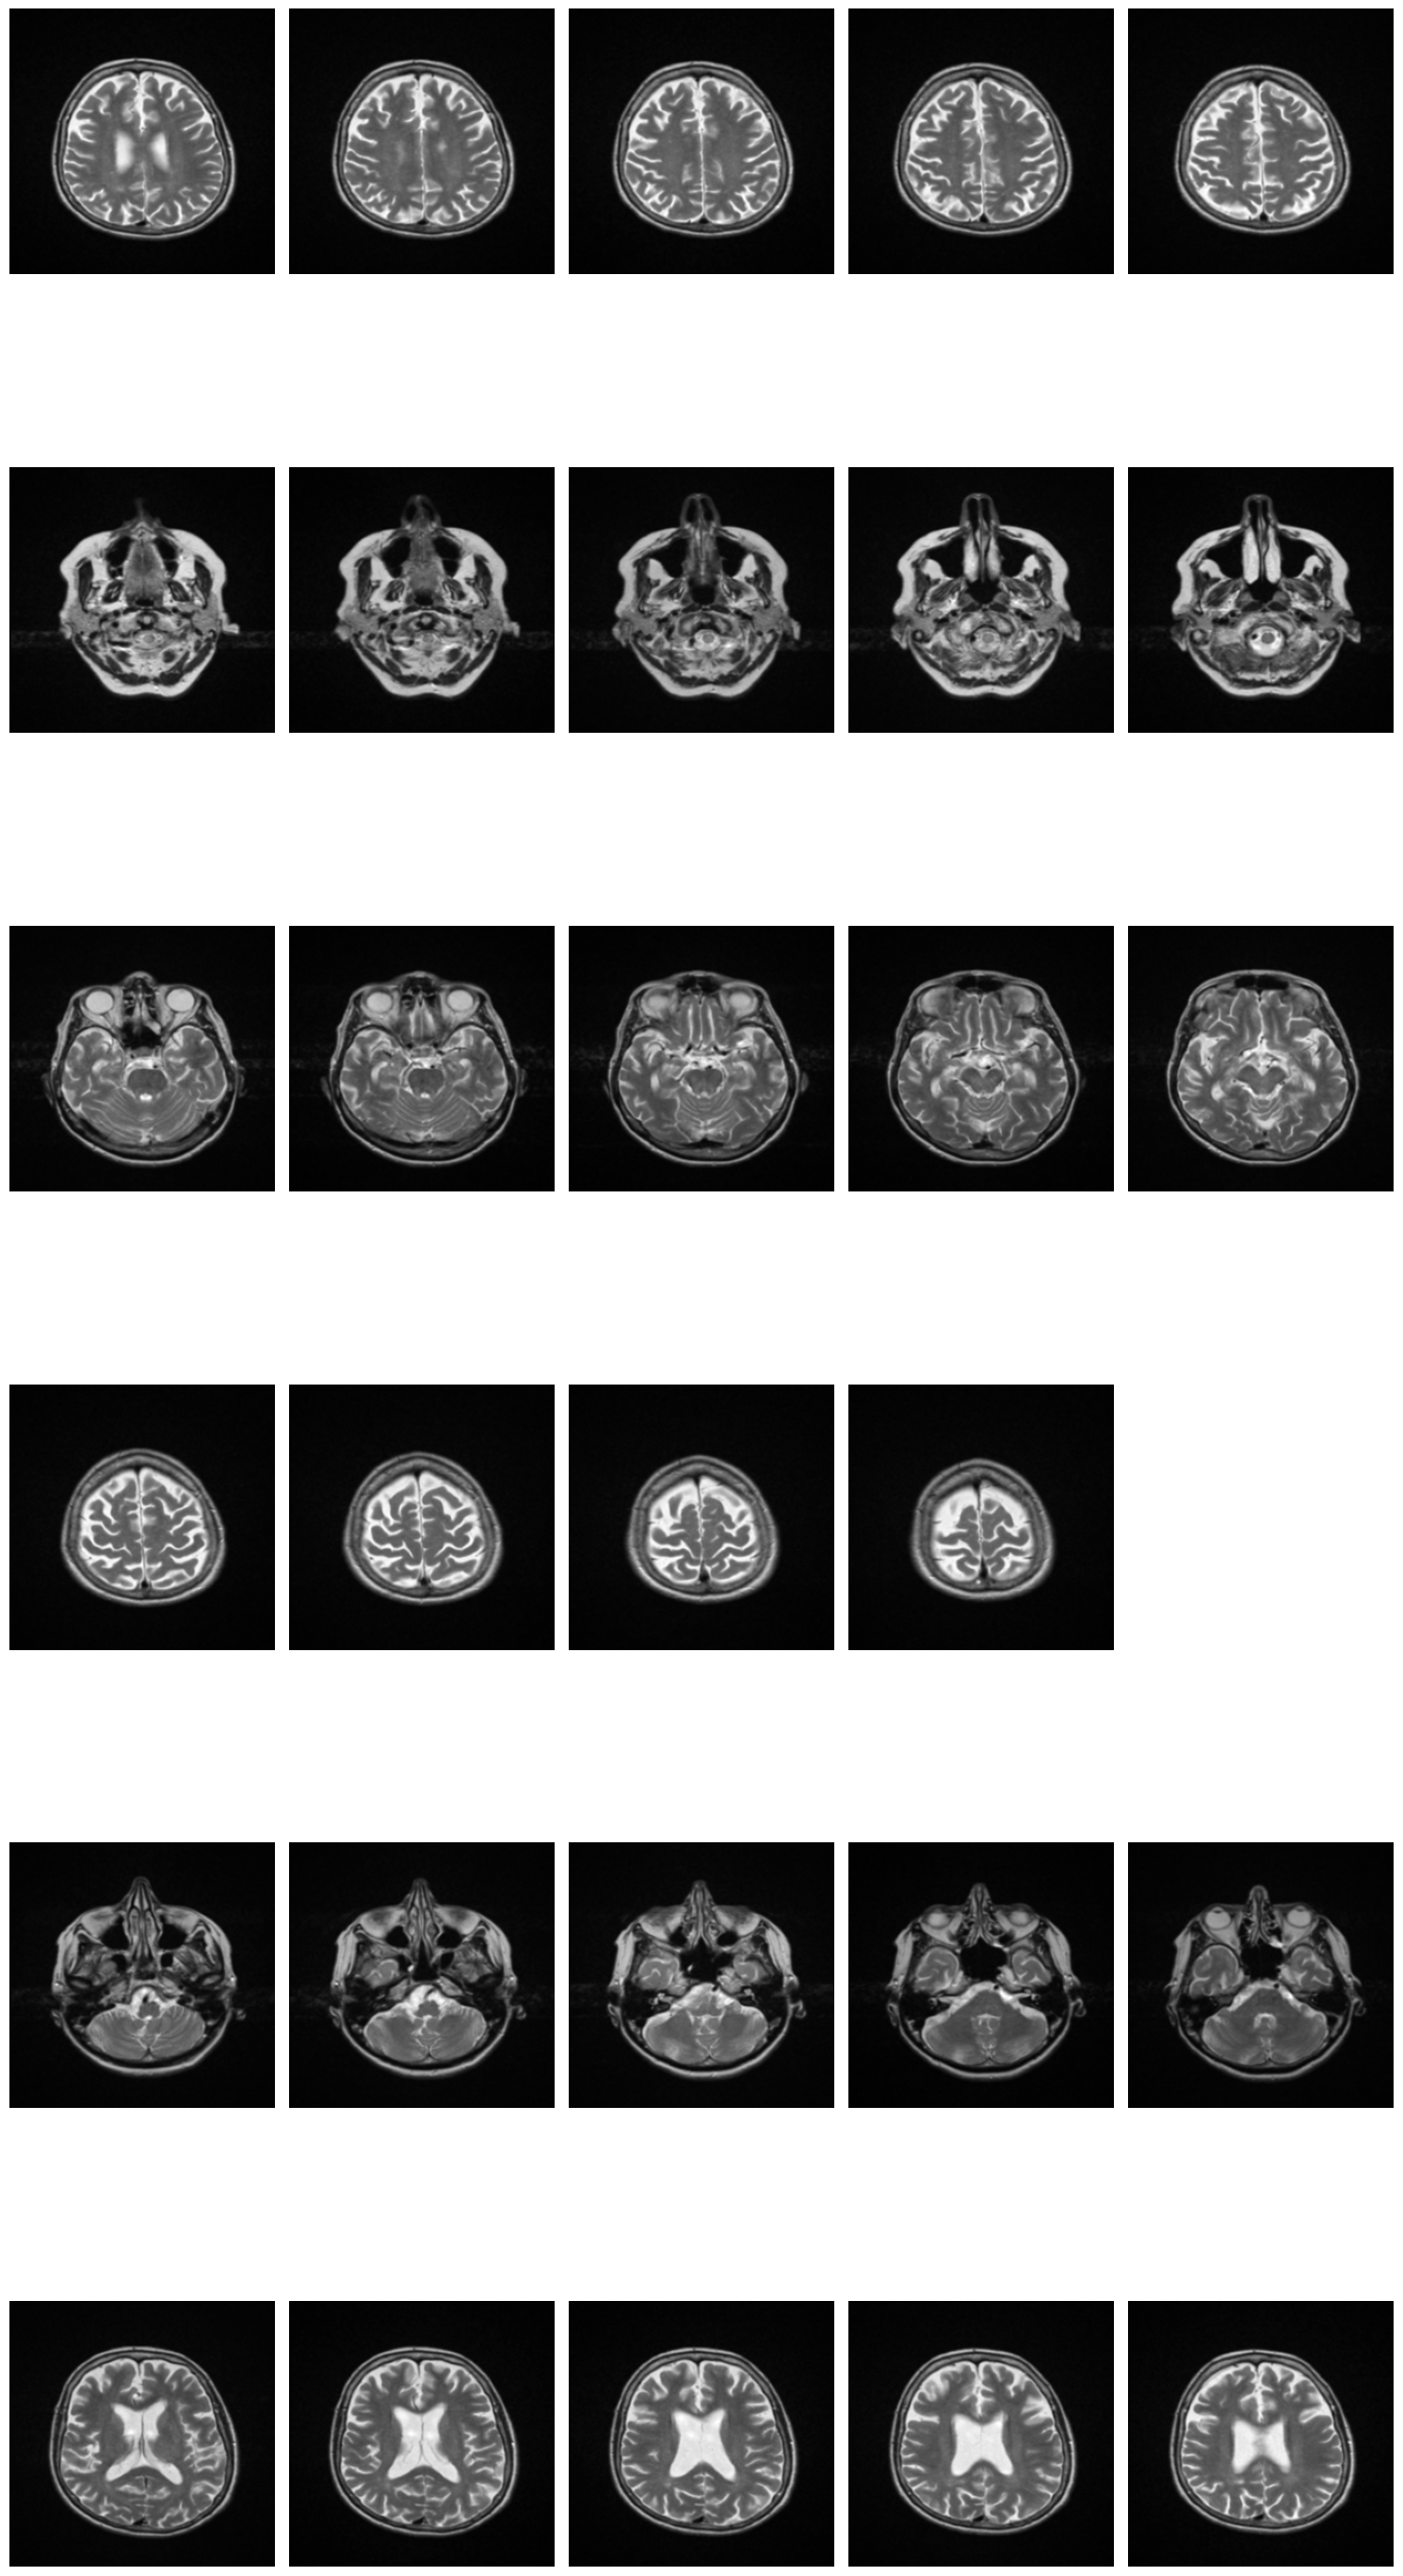

In [ ]:
import nibabel as nib
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fonction pour charger et traiter les données NIfTI
def load_nifti_data(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    # data = np.moveaxis(data, -1, 0)  # Reformater pour avoir (44, 256, 256)
    return data, img.affine

# Charger le premier fichier voxel NIfTI et entraîner le modèle K-means
file_path_1 = '/content/data/AD/I100111.nii.gz'
voxel_data_1, affine_1 = load_nifti_data(file_path_1)

num_images_1, height_1, width_1 = voxel_data_1.shape
flattened_images_1 = voxel_data_1.reshape(num_images_1, -1)

kmeans = KMeans(n_clusters=6, random_state=0).fit(flattened_images_1)
labels_1 = kmeans.labels_

# Visualiser les clusters du premier fichier
fig, axes = plt.subplots(6, 5, figsize=(15, 30))  # 10 clusters, 5 images par cluster
for i in range(6):
    cluster_images = voxel_data_1[labels_1 == i]
    for j in range(min(5, len(cluster_images))):
        ax = axes[i, j]
        ax.imshow(cluster_images[j], cmap='gray')
        ax.axis('off')
    for j in range(len(cluster_images), 5):
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
!mkdir /content/data1
!mkdir /content/data1/AD

In [ ]:
import os
import nibabel as nib
import numpy as np
from skimage.transform import resize
from sklearn.cluster import KMeans

# Fonction pour charger les données NIfTI
def load_nifti_data(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    # data = np.moveaxis(data, -1, 0)  # Reformater pour avoir (44, 256, 256)
    return data, img.affine

# Fonction pour redimensionner les données
def resize_data(data, target_shape):
    resized_data = np.asarray([resize(image, target_shape) for image in data])
    return resized_data

# Définir la forme cible pour le redimensionnement
target_shape = (256, 256)

# Chemin du répertoire contenant les fichiers
directory = '/content/data/AD/'
new_directory = '/content/data1/AD'
# Liste tous les fichiers dans le répertoire
files = os.listdir(directory)

# # Charger les données voxel et redimensionner pour le premier fichier pour obtenir la taille cible
# file_path = os.path.join(directory, files[files.index('I100111.nii.gz')])
# voxel_data, affine = load_nifti_data(file_path)
# resized_voxel_data = resize_data(voxel_data, target_shape)

# # Reformater les données pour le clustering
# num_images, height, width = resized_voxel_data.shape
# flattened_images = resized_voxel_data.reshape(num_images, -1)

# # Initialiser et entraîner le modèle K-means avec les données redimensionnées
# kmeans = KMeans(n_clusters=6, random_state=0).fit(flattened_images)

# # Indices de clusters spécifiés
# cluster_indices = [5]

# Boucle sur chaque fichier dans le répertoire
for file_name in files:
    # Vérifie si le fichier est un fichier NIfTI
    if file_name.endswith('.nii.gz'):
        # Chemin complet du fichier
        file_path = os.path.join(directory, file_name)

        # Charger les données voxel du fichier NIfTI
        voxel_data, affine = load_nifti_data(file_path)

        # Redimensionner les données pour qu'elles aient la même taille que le premier fichier
        resized_voxel_data = resize_data(voxel_data, target_shape)

        # Reformater les données pour le clustering
        num_images, height, width = resized_voxel_data.shape
        flattened_images = resized_voxel_data.reshape(num_images, -1)

        # Utiliser le modèle K-means pour prédire les clusters
        labels = kmeans.predict(flattened_images)

        # Sélectionner les images qui appartiennent aux clusters spécifiés
        selected_images = np.concatenate([resized_voxel_data[labels == cluster] for cluster in cluster_indices], axis=0)

        # Reformater les images pour retrouver la forme initiale
        selected_images = np.moveaxis(selected_images, 0, -1)

        # Créer un nouvel objet NIfTI
        new_img = nib.Nifti1Image(selected_images, affine)

        # Créer un nouveau chemin pour le fichier NIfTI
        new_file_path = os.path.join(new_directory, file_name)

        # Sauvegarder le nouveau fichier NIfTI
        nib.save(new_img, new_file_path)

        # Afficher le chemin du nouveau fichier NIfTI enregistré
        # print(f'Nouveau fichier NIfTI enregistré à : {new_file_path}')


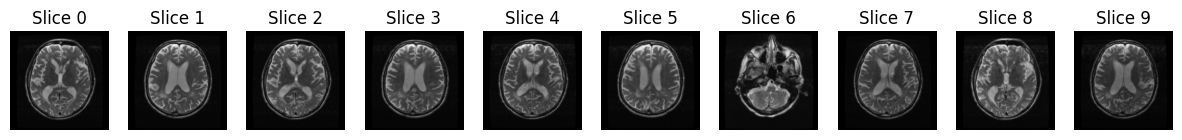

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

# Charger le fichier NIfTI
file_path = '/content/data1/AD/I106644.nii.gz'
img = nib.load(file_path)

# Récupérer les données de l'image
data = img.get_fdata()

# Afficher chaque coupe axiale de l'image
num_slices = data.shape[-1]
fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
for i in range(num_slices):
    axes[i].imshow(data[:, :, i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Slice {}'.format(i))
plt.show()


#### CN

##### k-means

In [ ]:
labels_1

array([0, 0, 4, 1, 3, 8, 6, 3, 1, 6, 5, 4, 8, 5, 3, 8, 6, 7, 5, 4, 8, 5,
       3, 2, 9, 9, 2, 5, 8, 7, 2, 1, 9, 6, 4, 1, 0, 4, 3, 1, 7, 9, 1, 4,
       1, 0, 4, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


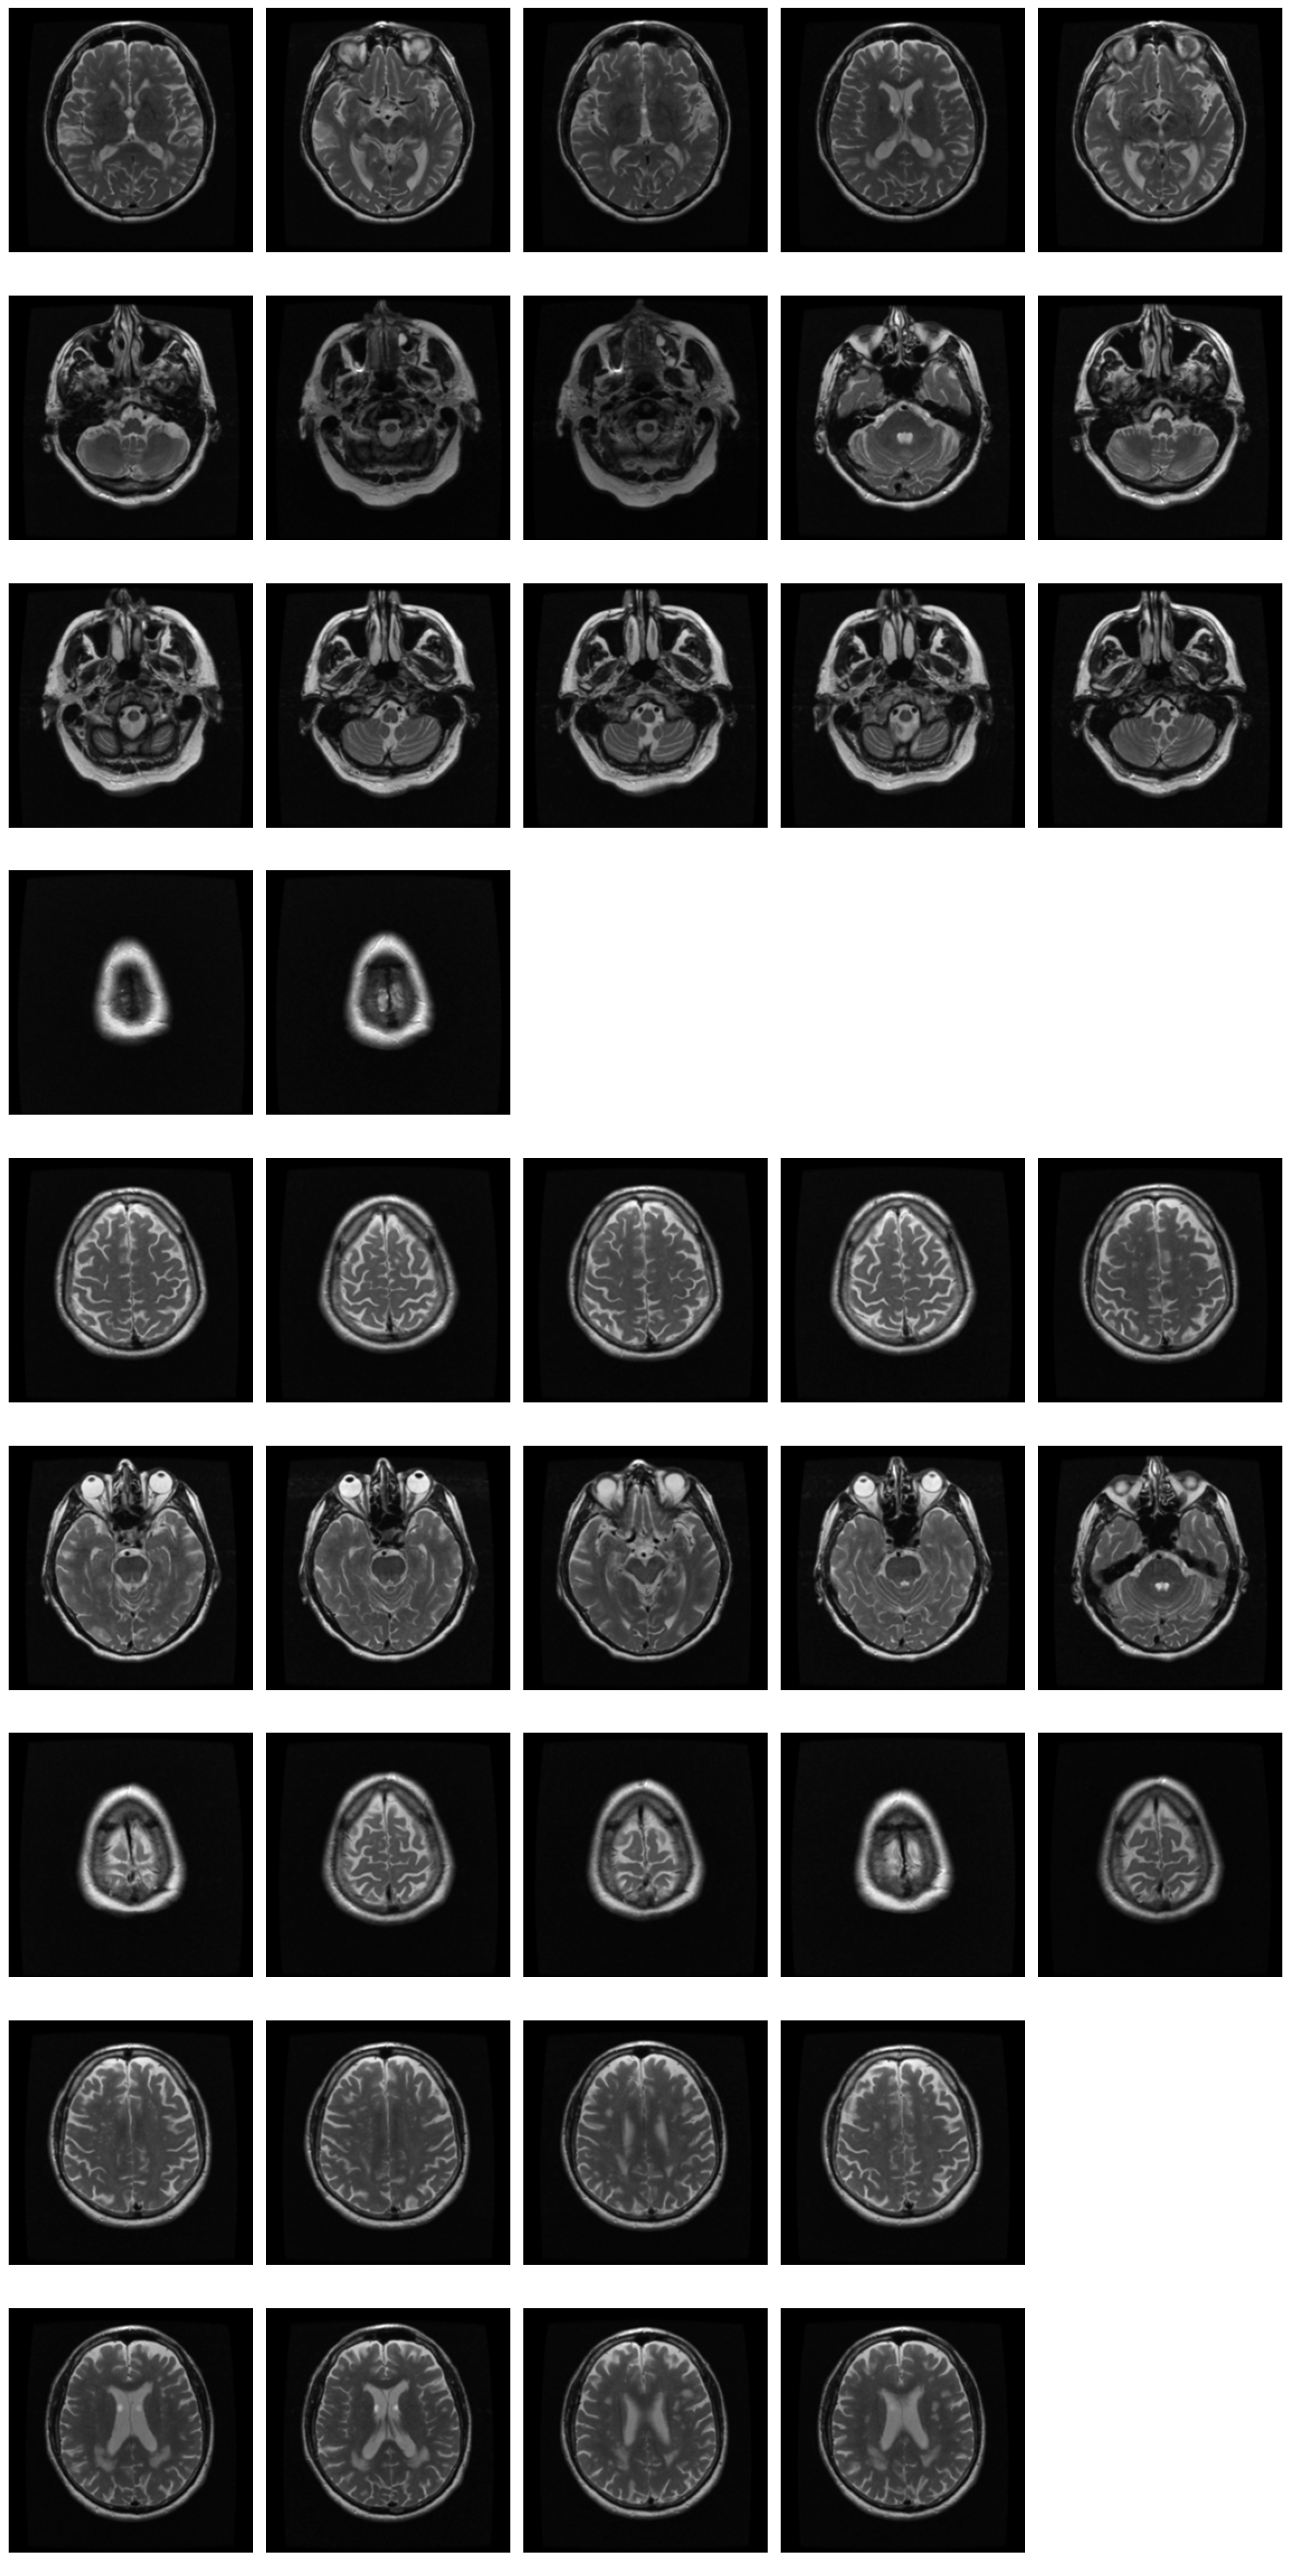

In [ ]:
import nibabel as nib
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fonction pour charger et traiter les données NIfTI
def load_nifti_data(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    # data = np.moveaxis(data, -1, 0)  # Reformater pour avoir (44, 256, 256)
    return data, img.affine

# Charger le premier fichier voxel NIfTI et entraîner le modèle K-means
file_path_1 = '/content/data/CN/I10031.nii.gz'
voxel_data_1, affine_1 = load_nifti_data(file_path_1)

num_images_1, height_1, width_1 = voxel_data_1.shape
flattened_images_1 = voxel_data_1.reshape(num_images_1, -1)

kmeans = KMeans(n_clusters=9, random_state=0).fit(flattened_images_1)
labels_1 = kmeans.labels_

# Visualiser les clusters du premier fichier
fig, axes = plt.subplots(9, 5, figsize=(15, 30))  # 10 clusters, 5 images par cluster
for i in range(9):
    cluster_images = voxel_data_1[labels_1 == i]
    for j in range(min(5, len(cluster_images))):
        ax = axes[i, j]
        ax.imshow(cluster_images[j], cmap='gray')
        ax.axis('off')
    for j in range(len(cluster_images), 5):
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
!mkdir /content/data1/CN

In [ ]:
import os
import nibabel as nib
import numpy as np
from skimage.transform import resize
from sklearn.cluster import KMeans

# Fonction pour charger les données NIfTI
def load_nifti_data(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    # data = np.moveaxis(data, -1, 0)  # Reformater pour avoir (44, 256, 256)
    return data, img.affine

# Fonction pour redimensionner les données
def resize_data(data, target_shape):
    resized_data = np.asarray([resize(image, target_shape) for image in data])
    return resized_data

# Définir la forme cible pour le redimensionnement
target_shape = (256, 256)

# Chemin du répertoire contenant les fichiers
directory = '/content/data/CN/'
new_directory = '/content/data1/CN'
# Liste tous les fichiers dans le répertoire
files = os.listdir(directory)

# Charger les données voxel et redimensionner pour le premier fichier pour obtenir la taille cible
file_path = os.path.join(directory, files[files.index('I10031.nii.gz')])
voxel_data, affine = load_nifti_data(file_path)
resized_voxel_data = resize_data(voxel_data, target_shape)

# Reformater les données pour le clustering
num_images, height, width = resized_voxel_data.shape
flattened_images = resized_voxel_data.reshape(num_images, -1)

# Initialiser et entraîner le modèle K-means avec les données redimensionnées
kmeans = KMeans(n_clusters=9, random_state=0).fit(flattened_images)

# Indices de clusters spécifiés
cluster_indices = [8]

# Boucle sur chaque fichier dans le répertoire
for file_name in files:
    # Vérifie si le fichier est un fichier NIfTI
    if file_name.endswith('.nii.gz'):
        # Chemin complet du fichier
        file_path = os.path.join(directory, file_name)

        # Charger les données voxel du fichier NIfTI
        voxel_data, affine = load_nifti_data(file_path)

        # Redimensionner les données pour qu'elles aient la même taille que le premier fichier
        resized_voxel_data = resize_data(voxel_data, target_shape)

        # Reformater les données pour le clustering
        num_images, height, width = resized_voxel_data.shape
        flattened_images = resized_voxel_data.reshape(num_images, -1)

        # Utiliser le modèle K-means pour prédire les clusters
        labels = kmeans.predict(flattened_images)

        # Sélectionner les images qui appartiennent aux clusters spécifiés
        selected_images = np.concatenate([resized_voxel_data[labels == cluster] for cluster in cluster_indices], axis=0)

        # Reformater les images pour retrouver la forme initiale
        selected_images = np.moveaxis(selected_images, 0, -1)

        # Créer un nouvel objet NIfTI
        new_img = nib.Nifti1Image(selected_images, affine)

        # Créer un nouveau chemin pour le fichier NIfTI
        new_file_path = os.path.join(new_directory, file_name)

        # Sauvegarder le nouveau fichier NIfTI
        nib.save(new_img, new_file_path)

        # Afficher le chemin du nouveau fichier NIfTI enregistré
        # print(f'Nouveau fichier NIfTI enregistré à : {new_file_path}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


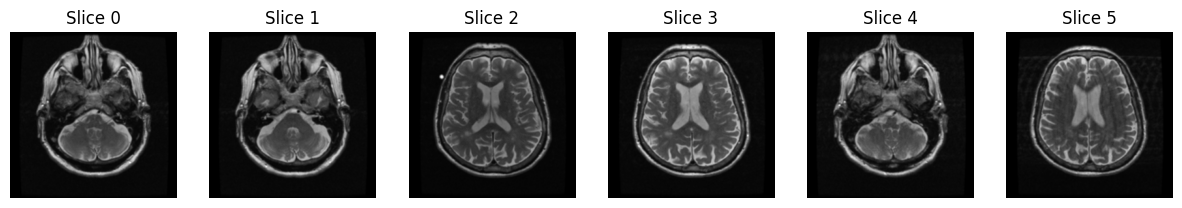

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib

# Charger le fichier NIfTI
file_path = '/content/data1/CN/I18593.nii.gz'
img = nib.load(file_path)

# Récupérer les données de l'image
data = img.get_fdata()

# Afficher chaque coupe axiale de l'image
num_slices = data.shape[-1]
fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
for i in range(num_slices):
    axes[i].imshow(data[:, :, i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Slice {}'.format(i))
plt.show()


#### ANALYE

In [ ]:
import os
import nibabel as nib
import pandas as pd

# Remplacez par le chemin de votre dossier contenant les fichiers .nii.gz
dossier = '/content/data1/CN'

# Liste pour stocker les informations de forme des fichiers
shapes = []

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier):
    if fichier.endswith('.nii.gz'):
        # Chemin complet du fichier
        chemin_fichier = os.path.join(dossier, fichier)

        # Charger le fichier NIfTI
        img = nib.load(chemin_fichier)

        # Obtenir la forme de l'image
        shape = img.shape

        # Ajouter les informations de forme à la liste
        shapes.append((chemin_fichier, shape))

# Convertir la liste en DataFrame pour faciliter le tri
df = pd.DataFrame(shapes, columns=['Chemin', 'Shape'])

# Ajouter une colonne pour shape[2]
df['Shape_2'] = df['Shape'].apply(lambda x: x[2] if len(x) > 2 else -1)  # Gérer les images qui n'ont pas de troisième dimension

# Filtrer les fichiers avec shape[2] > 0
df_filtered = df[df['Shape_2'] > 0]

# Afficher les chemins des fichiers filtrés
print(df_filtered[['Chemin', 'Shape']])

# Calculer la somme des valeurs de Shape_2
somme_shape_2 = df_filtered['Shape_2'].sum()

# Afficher la somme
print(f"La somme de Shape[2] pour les fichiers filtrés est : {somme_shape_2}")


                               Chemin           Shape
1     /content/data1/CN/I66962.nii.gz   (256, 256, 2)
2     /content/data1/CN/I10935.nii.gz   (256, 256, 1)
4    /content/data1/CN/I352097.nii.gz   (256, 256, 3)
5     /content/data1/CN/I17402.nii.gz  (256, 256, 11)
7     /content/data1/CN/I18593.nii.gz   (256, 256, 6)
..                                ...             ...
439  /content/data1/CN/I139454.nii.gz   (256, 256, 6)
441   /content/data1/CN/I77838.nii.gz   (256, 256, 2)
444   /content/data1/CN/I36311.nii.gz   (256, 256, 1)
446   /content/data1/CN/I71757.nii.gz   (256, 256, 1)
449   /content/data1/CN/I49246.nii.gz   (256, 256, 1)

[254 rows x 2 columns]
La somme de Shape[2] pour les fichiers filtrés est : 891
